In [1]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
base_dir = '/Users/anasarodake/DataSpell/UnI-ML-DL/video_Ki/images'
classes = ['smile' , 'neutral']

In [3]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [4]:
IMG_SHAPE = 250

batch_size =50

image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    #zoom_range=0.5,
    horizontal_flip=True,
    #width_shift_range=0.15,
    #height_shift_range=0.15
)

train_data_gen = image_gen.flow_from_directory(
    directory=train_dir,
    shuffle=True,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode='sparse',
    classes=classes
)

Found 1643 images belonging to 2 classes.


In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
#dieser ablock sucht nach Bildern, die evtl. einen Fehler bei ber Implimentierung verursachen und zeigt sie auf
import PIL
from pathlib import Path
path = Path(train_dir).rglob("*.jpeg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)

In [7]:
image_gen = ImageDataGenerator(
    rescale=1./255
)


val_data_gen =  image_gen.flow_from_directory(
    directory=val_dir,
    classes=classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode= 'sparse')

Found 230 images belonging to 2 classes.


In [8]:
image_gen = ImageDataGenerator(
    rescale=1./255
)


test_data_gen =  image_gen.flow_from_directory(
    directory=test_dir,
    classes=classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode= 'sparse')




Found 687 images belonging to 2 classes.


In [9]:
model = Sequential()


model.add(Conv2D(4,3 , padding='same' , input_shape=(IMG_SHAPE, IMG_SHAPE, 3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16,3 , padding='same' , input_shape=(IMG_SHAPE, IMG_SHAPE, 3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Conv2D(32, 3 ,padding='same' , activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))






model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dropout(0.4))

#
model.add(Dense(512 ,  activation='relu'))


model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

Metal device set to: Apple M1


2022-04-19 22:21:52.208566: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-19 22:21:52.208866: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [11]:
#from tensorflow.python.keras.callbacks import EarlyStopping
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss' , patience= 3 , verbose=1)

epochs = 20
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))), #alle Bilder / 10
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size))),
    #callbacks=[callback]
)

Epoch 1/20


2022-04-19 22:21:52.926967: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-04-19 22:21:53.211913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 0.8413 - accuracy: 0.5344

2022-04-19 22:22:08.348835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 16s 468ms/step - loss: 0.8413 - accuracy: 0.5344 - val_loss: 0.6741 - val_accuracy: 0.7130
Epoch 2/20
33/33 [==============================] - 15s 457ms/step - loss: 0.6491 - accuracy: 0.6336 - val_loss: 0.4866 - val_accuracy: 0.7913
Epoch 3/20
33/33 [==============================] - 15s 443ms/step - loss: 0.4310 - accuracy: 0.8089 - val_loss: 0.3251 - val_accuracy: 0.8435
Epoch 4/20
33/33 [==============================] - 15s 438ms/step - loss: 0.2993 - accuracy: 0.8789 - val_loss: 0.2955 - val_accuracy: 0.8478
Epoch 5/20
33/33 [==============================] - 14s 431ms/step - loss: 0.2599 - accuracy: 0.8898 - val_loss: 0.1590 - val_accuracy: 0.9348
Epoch 6/20
33/33 [==============================] - 15s 440ms/step - loss: 0.2103 - accuracy: 0.9154 - val_loss: 0.1572 - val_accuracy: 0.9304
Epoch 7/20
33/33 [==============================] - 15s 437ms/step - loss: 0.1667 - accuracy: 0.9355 - val_loss: 0.0904 - val_accuracy: 0.9652
Epoch 8/20

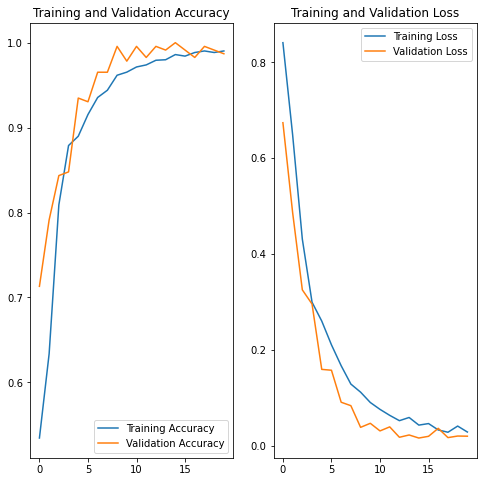

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
evaluated = model.evaluate(
    x = test_data_gen)

14/14 [==============================] - 2s 129ms/step - loss: 0.0096 - accuracy: 0.9971


In [14]:
predict_dir_smile = os.path.join(base_dir, 'test/smile')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_smile_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir_smile,
    classes = classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 354,
    class_mode= 'sparse'
)



predicted_smile = model.predict(x = predict_smile_data_gen)



for value in predicted_smile:
    print("\nLächeln Bild, die KI Werte:    lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ) , "   richtig geschätzt:  " ,  (value[0] > value[1]) )

Found 354 images belonging to 2 classes.


2022-04-19 22:26:54.400057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.67      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.49      Neutral:1    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.99      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.79      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.94      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI

In [15]:
index = 0
false_images = np.array([])
for value in predicted_smile:
    if value[0] < value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format( round(value[0] *100 , 2) ,round(value[1] *100) , index ))
        false_images = np.append(false_images , int(index))
    index = index+1



falsch geschätztes BILD:    lachen: 29.09      Neutral: 71        Bild_Index: 247
falsch geschätztes BILD:    lachen: 47.87      Neutral: 52        Bild_Index: 320


In [16]:
print("zahl der Falsch geschätzten Bilder: " , len(false_images), " von : ", len (predicted_smile))
evaluated = model.evaluate(
    x = predict_smile_data_gen)

zahl der Falsch geschätzten Bilder:  2  von :  354
1/1 [==============================] - 1s 1s/step - loss: 0.0146 - accuracy: 0.9944


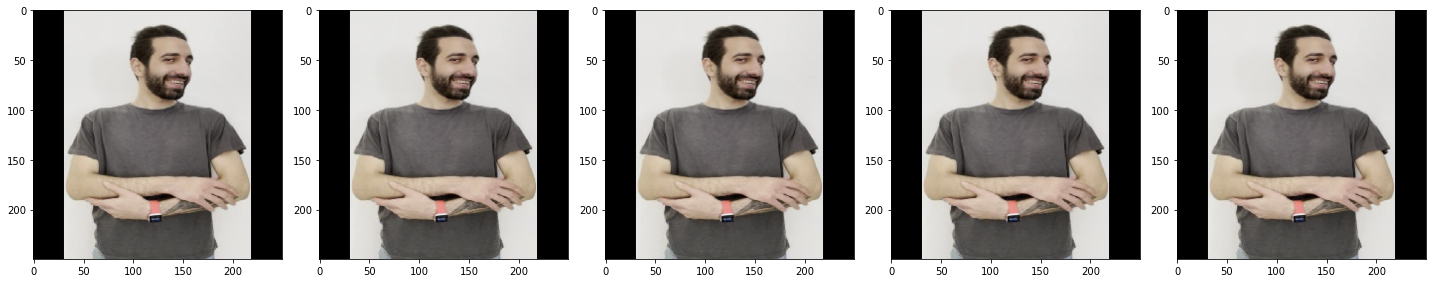

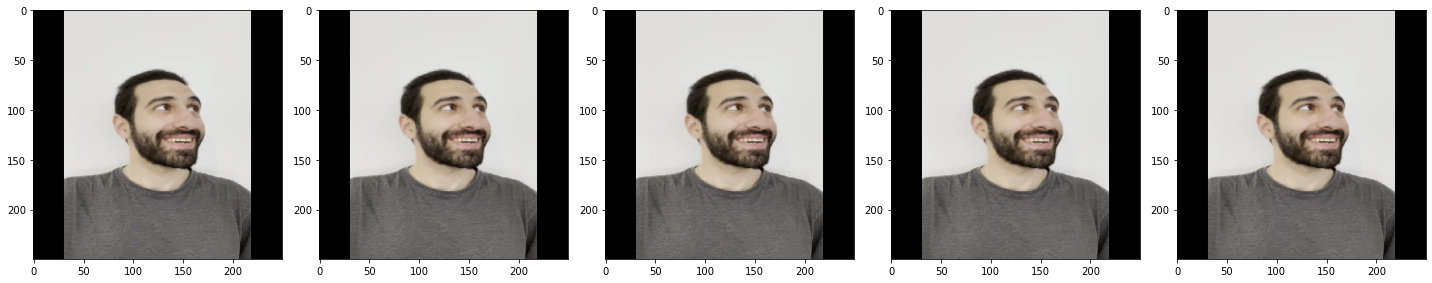

In [17]:
for pic in false_images:
    augmented_images = [predict_smile_data_gen[0][0][int(pic)] for i in range(5)]
    plotImages(augmented_images)

In [18]:
predict_dir = os.path.join(base_dir, 'test/neutral')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_neutral_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 333,
    class_mode= 'sparse')



predicted = model.predict(x = predict_neutral_data_gen)
for value in predicted:
    print("Neutrales Bild, die KI Werte:   lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ))

Found 333 images belonging to 1 classes.
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.01      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.02      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:1

In [19]:
index = 0
false_images = np.array([])
for value in predicted:
    if value[0] > value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format( round(value[0] *100 , 2) ,round(value[1] *100) , index ))
        false_images = np.append(false_images , int(index))
    index = index+1

In [20]:
print("zahl der Falsch geschätzten Bilder: " , len(false_images) , " von : ", len (predicted))

zahl der Falsch geschätzten Bilder:  0  von :  333


In [21]:
for pic in false_images:
    augmented_images = [predict_neutral_data_gen[0][0][int(pic)] for i in range(5)]
    plotImages(augmented_images)

Found 43 images belonging to 2 classes.
1/1 [==============================] - 0s 179ms/step - loss: 0.4243 - accuracy: 0.9535
lach Bild, die KI Werte:   lachen:0.01      Neutral:100
lach Bild, die KI Werte:   lachen:100.0      Neutral:0
lach Bild, die KI Werte:   lachen:0.0      Neutral:100
lach Bild, die KI Werte:   lachen:0.0      Neutral:100
lach Bild, die KI Werte:   lachen:87.3      Neutral:13
lach Bild, die KI Werte:   lachen:0.01      Neutral:100
lach Bild, die KI Werte:   lachen:0.11      Neutral:100
lach Bild, die KI Werte:   lachen:0.0      Neutral:100
lach Bild, die KI Werte:   lachen:0.0      Neutral:100
lach Bild, die KI Werte:   lachen:0.28      Neutral:100
lach Bild, die KI Werte:   lachen:0.01      Neutral:100
lach Bild, die KI Werte:   lachen:0.0      Neutral:100
lach Bild, die KI Werte:   lachen:0.0      Neutral:100
lach Bild, die KI Werte:   lachen:0.0      Neutral:100
lach Bild, die KI Werte:   lachen:0.05      Neutral:100
lach Bild, die KI Werte:   lachen:41.74   

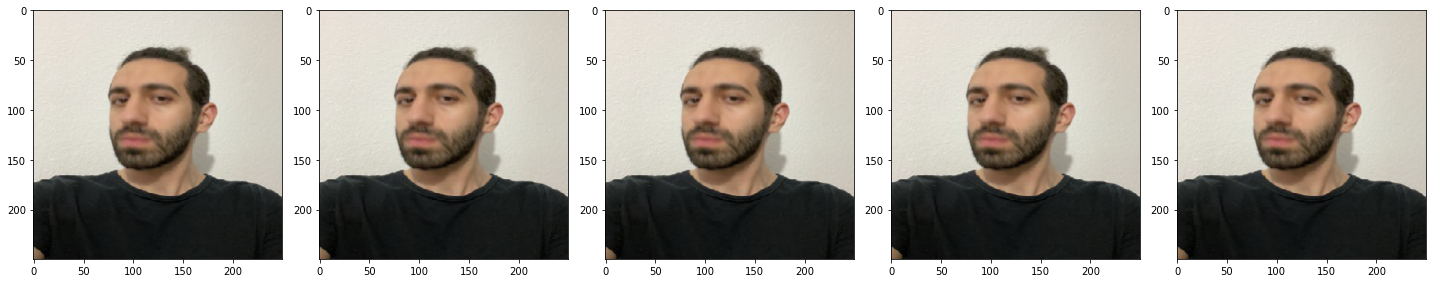

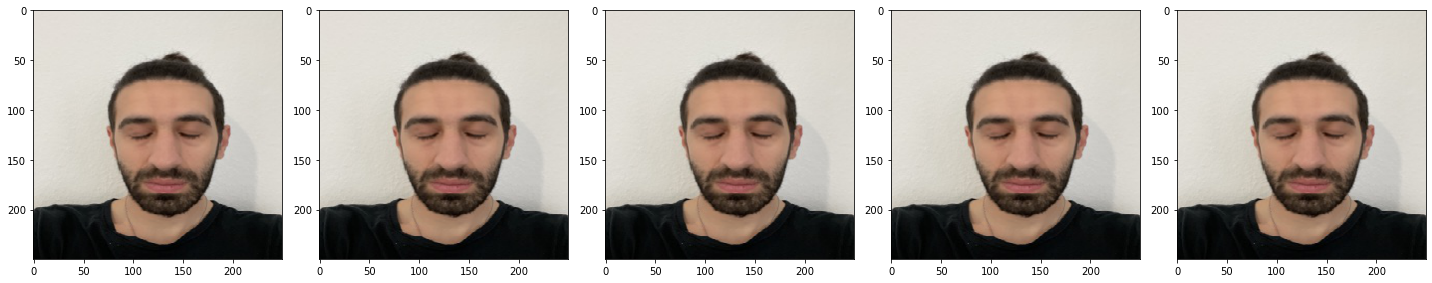

In [36]:
predict_dir = os.path.join("/Users/anasarodake/anas_fotos/predict/", 'neutral')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_neutral_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 333,
    #classes= classes,
    class_mode= 'sparse')



predicted1 = model.evaluate(x = predict_neutral_data_gen)
predicted = model.predict(x = predict_neutral_data_gen)


for value in predicted:
    print("lach Bild, die KI Werte:   lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ))
    index = 0
false_images = np.array([])
for value in predicted:
    if value[0] > value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format(
            round(value[0] * 100, 2), round(value[1] * 100), index))
        false_images = np.append(false_images, int(index))
    index = index + 1
print("zahl der Falsch geschätzten Bilder: ", len(false_images), " von : ", len(predicted))
for pic in false_images:
    augmented_images = [predict_neutral_data_gen[0][0][int(pic)] for i in range(5)]
    plotImages(augmented_images)